本文件的程序用于筛选出适合检验的股票，针对新三板的公司，需要踢除的公司包括了：
* 从主板退市的54家公司；
* 继承的“两网”（下边有原因的说明）8家公司，
* 保险、银行、证券、小额信贷、基金等金融类144家公司

数据来源于Wind资讯和同花顺。数据库导出的原始数据不包含已经退市的公司，所以在进行分析时加回了那些退市的公司。

文中使用的代号：NEEQ表示新三板公司（代码以4或8开头），MB表示主板（代码以00、60开头，主板不包含B股股票），SME表示中小企业板（代码以002开头），ChiNext表示创业板（代码以300开头）。还有一部分可能涉及到预披露的、正在接受核准的以及正在等待证券发行的拟上市公司对应的信息（通常是wind或者同花顺数据库自己编码的以A开头的代码）

所有数据选自从新三板建立之初（2006）到2016年4月30日。有效的“新三板”样本6867家公司。

In [1]:
%matplotlib inline
import numpy 
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stocks_neeq = pandas.read_excel("../data/raw/挂牌公司一览.xlsx")
stocks_neeq = stocks_neeq.iloc[:-2] #最后两行不是有用信息
stocks_neeq_20160430 = pandas.read_excel("../data/raw/挂牌公司一览20160430.xls")
stocks_neeq = stocks_neeq.append(stocks_neeq_20160430)

In [3]:
stocks_neeq["所属园区"].value_counts()

非高新产业区           5128
中关村科技园区           829
武汉东湖高新区            93
上海张江高新技术产业开发区      86
成都高新区              64
郑州高新区              57
西安高新区              57
济南高新区              54
主板退市公司             54
长沙高新区              39
天津滨海高新技术产业开发区      32
合肥高新区              30
厦门火炬高新区            29
苏州高新区              29
广州高新区              28
大连高新区              28
深圳高新区              28
南京高新区              20
洛阳高新区              18
宁波高新区              18
南昌高新区              17
东莞松山湖高新区           15
石家庄高新区             14
哈尔滨高新区             12
长春高新区              12
太原高新区              11
昆明高新区              11
烟台高新区               9
乌鲁木齐高新区             9
贵阳高新区               9
                 ... 
新莱芜高新技术产业开发区        3
蚌埠高新区               2
泰安高新区               2
杭州高新区               2
佛山高新区               2
自贡高新区               2
鞍山高新区               2
福州高新区               2
襄樊高新区               2
徐州高新区               2
桂林高新区               2
宝鸡高新区               2
肇庆高新区               2
新乡高新区               2
温州高新区     

In [4]:
MB_delist = stocks_neeq[stocks_neeq["所属园区"] == "主板退市公司"]

In [5]:
len(MB_delist) #与wind退市中数量一致

54

In [6]:
#踢除主板退市到新三板的公司
stocks_neeq = stocks_neeq[stocks_neeq["所属园区"] != "主板退市公司"]

在新三板挂牌的公司还包括了原两网的公司（NET和STAQ），两网的公司是在90年代有中国人民银行批准设立的，总用9家公司（粤传媒(400003)上市后剩余8家公司），由于政策方面的约束，此类公司即便在三板市场上依然不被允许进行新的融资而只能股份转让。这些公司包含了： 
* 大自然（400001），该股票已经在在新三板退市，并以834019为代码成为全国股转公司的挂牌企业。可能出现的问题是，数据库把400001公布的财务信息也作为了新挂牌公司的财务信息，因此，处理时直接以新挂牌的公司转让公告书中披露的财务信息作为检验标准（To-do: 作为对比直接踢除这家公司的数据。）
* 长白5 (400002)
* 海国实5(400005)
* 京中兴5(400006)
* 华凯1 (400007)
* 广建1 (400009)
* 鹫峰5 (400010)
* 港岳1 (400013)

In [7]:
stkcs_net_staq = ["400001.OC", "400002.OC", "400005.OC", "400006.OC", "400007.OC", "400009.OC", "400010.OC", "400013.OC"]

stocks_neeq = stocks_neeq[~stocks_neeq["证券代码"].isin(stkcs_net_staq)]

In [8]:
len(stocks_neeq)

6947

In [9]:
stocks_neeq[stocks_neeq["证券代码"] == "834019.OC"]

,证券代码,证券简称,挂牌日期,主办券商,转让方式,主营产品,股份总量(万股),可交易股份总量(万股),最新成交价(元),最新成交日,总市值(万元),所属Wind行业,所属证监会行业,所属园区
2323,834019.OC,大自然,2015-11-23,申万宏源证券有限公司,协议转让,高分子聚合物,8560.06,6871.0,7.35,2016-04-14 00:00:00,62916.441,材料Ⅱ,化学原料和化学制品制造业,非高新产业区
6644,834019.OC,大自然,2001-07-16,申万宏源证券有限公司,协议转让,高分子聚合物,8560.06,6871.0,7.35,2016-04-14 00:00:00,62916.441,材料Ⅱ,化学原料和化学制品制造业,其他


In [10]:
stocks_neeq = stocks_neeq.drop(6644)

In [11]:
stocks_neeq[stocks_neeq["证券代码"] == "834019.OC"]

,证券代码,证券简称,挂牌日期,主办券商,转让方式,主营产品,股份总量(万股),可交易股份总量(万股),最新成交价(元),最新成交日,总市值(万元),所属Wind行业,所属证监会行业,所属园区
2323,834019.OC,大自然,2015-11-23,申万宏源证券有限公司,协议转让,高分子聚合物,8560.06,6871.0,7.35,2016-04-14 00:00:00,62916.441,材料Ⅱ,化学原料和化学制品制造业,非高新产业区


退市股票处理：11个转板上市公司，1个连续四年亏损，16个吸收合并的公司，3家公司将公司变为有限责任公司，6家公司未说明退市原因。在数据库退市股票列表里有两家公司400001和400003属于两网公司转板，不作为研究样本处理。

In [12]:
delisting = pandas.read_excel("../data/raw/退市股票一览.xlsx") #2016年4月15日之前退市的公司
delisting = delisting[:-2]

In [13]:
delisting.head()

,代码,名称,挂牌日期,退市日期,退市时股价(元),退市时每股净资产(元),终止上市原因
0,400001.OC,大自然5(退市),2015-11-20,2015-11-03,5.62,3.20,转板上市
1,833097.OC,众益制药(退市),2015-07-29,2015-08-27,NaN,3.66,NaN
2,831976.OC,祥辉电缆(退市),2015-02-11,2015-06-10,NaN,1.02,NaN
3,831966.OC,业际光电(退市),2015-02-10,2015-09-30,NaN,2.01,吸收合并
4,831812.OC,宇寿医疗(退市),2015-01-16,2015-12-02,NaN,3.04,吸收合并


In [14]:
delisting = delisting[~delisting["代码"].isin(["400001.OC", "400003.OC"])]

In [15]:
stkcd = stocks_neeq["证券代码"].append(delisting["代码"])

In [16]:
stkcd[stkcd.duplicated()]

Series([], dtype: object)

In [17]:
delisting = pandas.read_excel("../data/delist.xls")

In [18]:
delisting.head()

,证券代码,证券简称,挂牌日期,摘牌日期,主办券商,转让方式,主营产品,股份总量(万股),可交易股份总量(万股),最新成交价(元),最新成交日,总市值(万元),所属Wind行业,所属证监会行业,所属园区,终止上市原因
0,430001.OC,世纪瑞尔(退市),2006-01-18,2010-12-06,申银万国证券股份有限公司,NaN,NaN,54000.0000,35772.8472,9.99,2010-12-06,NaN,软件和信息技术服务业,软件与服务,中关村科技园区非上市股份有限公司,转板上市
1,430006.OC,北陆药业(退市),2006-08-23,2009-09-30,广发证券股份有限公,NaN,NaN,33050.9651,24856.3514,5.50,2009-09-30,NaN,医药制造业,制药、生物科技与生命科学,中关村科技园区非上市股份有限公司,转板上市
2,430007.OC,久其软件(退市),2006-09-06,2009-07-29,申银万国证券股份有限公司,NaN,NaN,21659.6780,7043.2625,15.00,2009-07-29,NaN,软件和信息技术服务业,软件与服务,中关村科技园区非上市股份有限公司,转板上市
3,430008.OC,紫光华宇(退市),2006-08-25,2011-09-28,国信证券有限责任公,NaN,NaN,64222.2018,45897.6142,11.00,2011-09-28,NaN,软件和信息技术服务业,软件与服务,中关村科技园区非上市股份有限公司,转板上市
4,430012.OC,博晖创新(退市),2007-02-12,2012-05-10,国信证券有限责任公,NaN,NaN,40910.5938,20346.9608,7.00,2012-05-10,NaN,专用设备制造业,制药、生物科技与生命科学,中关村科技园区非上市股份有限公司,转板上市


In [19]:
stocks_neeq_all = pandas.concat([stocks_neeq, delisting], ignore_index=True)

In [20]:
len(stocks_neeq_all)

6981

In [21]:
len(stocks_neeq), len(delisting)

(6946, 35)

In [22]:
stocks_neeq_all.iloc[0]

主办券商                    兴业证券股份有限公司
主营产品                        铝合金及制品
可交易股份总量(万股)                1404.88
总市值(万元)                        NaN
所属Wind行业                       材料Ⅱ
所属园区                        非高新产业区
所属证监会行业                      金属制品业
挂牌日期           2016-04-15 00:00:00
摘牌日期                           NaT
最新成交价(元)                       NaN
最新成交日                          NaN
终止上市原因                         NaN
股份总量(万股)                    2775.5
证券代码                     835907.OC
证券简称                           海德曼
转让方式                          协议转让
Name: 0, dtype: object

In [23]:
stocks_neeq_all[stocks_neeq_all["所属证监会行业"].isnull()]

,主办券商,主营产品,可交易股份总量(万股),总市值(万元),所属Wind行业,所属园区,所属证监会行业,挂牌日期,摘牌日期,最新成交价(元),最新成交日,终止上市原因,股份总量(万股),证券代码,证券简称,转让方式
1312,大通证券股份有限公司,存贷款业务,2891.6666,NaN,多元金融,非高新产业区,NaN,2016-01-11,NaT,NaN,NaN,NaN,10100.0000,835458.OC,元丰小贷,协议转让
5829,中泰证券股份有限公司,系统集成服务,238.7000,1.838275e+06,软件与服务,昆明高新区,NaN,2014-06-06,NaT,6.95,2016-04-12 00:00:00,NaN,264500.0000,830806.OC,亚锦科技,协议转让
6384,西部证券股份有限公司,软件外包服务、专业咨询服务,6218.7494,4.118265e+04,软件与服务,上海张江高新技术产业开发区,NaN,2013-05-17,NaT,3.00,2016-04-14 00:00:00,NaN,13727.5513,430217.OC,申石软件,协议转让


In [24]:
stocks_neeq_all.loc[stocks_neeq_all["证券代码"] == "835458.OC", "所属证监会行业"] = "货币金融服务"
stocks_neeq_all.loc[stocks_neeq_all["证券代码"] == "830806.OC", "所属证监会行业"] = "软件和信息技术服务业"
stocks_neeq_all.loc[stocks_neeq_all["证券代码"] == "430217.OC", "所属证监会行业"] = "互联网和相关服务业"

In [25]:
stocks_neeq_all[stocks_neeq_all["所属证监会行业"].isnull()]

,主办券商,主营产品,可交易股份总量(万股),总市值(万元),所属Wind行业,所属园区,所属证监会行业,挂牌日期,摘牌日期,最新成交价(元),最新成交日,终止上市原因,股份总量(万股),证券代码,证券简称,转让方式


In [26]:
finance_sector = ["货币金融服务", "资本市场服务", "保险业", "其他金融业"]

print(len(stocks_neeq_all[stocks_neeq_all["所属证监会行业"].isin(finance_sector)]))

stocks_neeq_all = stocks_neeq_all[~stocks_neeq_all["所属证监会行业"].isin(finance_sector)]

114


In [27]:
stocks_neeq_all.to_csv("../data/NEEQ_sample.csv", index=False)

In [28]:
a = len(stocks_neeq_all[stocks_neeq_all["挂牌日期"] <= pandas.Timestamp('2009-10-30 00:00:00')])

由此得到的“新三板”公司的有效样本数量为{{len(stocks_neeq_all)}}。

“新三板”样本公司最早的挂牌时间为{{stocks_neeq_all["挂牌日期"].min()}}，所以在选择与之对比的A股主板、中小板和创业板公司时也选择从2006年以后，其中创业板开始于2009年10月，在2006到2009年10月之间挂牌的新三板公司有{{a}}家公司。

由于所有适合本研究的“新三板”公司均为2006年之后挂牌交易的，所以对应的主板、中小板和创业板公司也将会选择2005年之后IPOs的公司作为对比的对象。后续的检验也会将主中创三个板块的定向增发作为对比对象，以保证在发行过程上有些许的可比性。

- To-do: 需要确定估计样本的来源，备选的方案包括了：（1）可以使用当年所有已经上市的公司作为估计样本；（2）可以使用当年所有上市已经超过一年的公司作为样本；（3）使用规模分层的估计方法；

In [47]:
stocks_neeq_all.iloc[0]

主办券商                    兴业证券股份有限公司
主营产品                        铝合金及制品
可交易股份总量(万股)                1404.88
总市值(万元)                        NaN
所属Wind行业                       材料Ⅱ
所属园区                        非高新产业区
所属证监会行业                      金属制品业
挂牌日期           2016-04-15 00:00:00
摘牌日期                           NaT
最新成交价(元)                       NaN
最新成交日                          NaN
终止上市原因                         NaN
股份总量(万股)                    2775.5
证券代码                     835907.OC
证券简称                           海德曼
转让方式                          协议转让
挂牌年度                          2016
Name: 0, dtype: object

In [46]:
year = lambda x: x.year
stocks_neeq_all["挂牌年度"] = stocks_neeq_all["挂牌日期"].apply(year)

In [55]:
stocks_neeq_all["挂牌年度"].value_counts().sort_index()

2006      10
2007      14
2008      17
2009      20
2010      16
2011      25
2012     105
2013     156
2014    1220
2015    3475
2016    1809
Name: 挂牌年度, dtype: int64

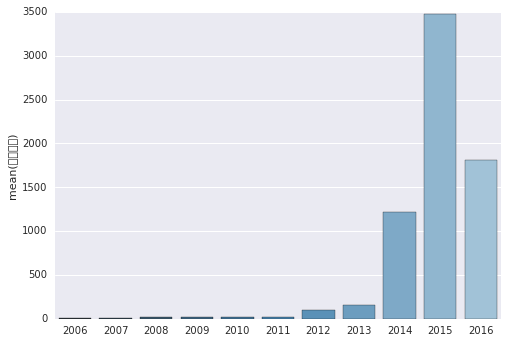

In [70]:
sns.barplot(stocks_neeq_all["挂牌年度"].value_counts().sort_index().index, 
           stocks_neeq_all["挂牌年度"].value_counts().sort_index(), palette="Blues_d");

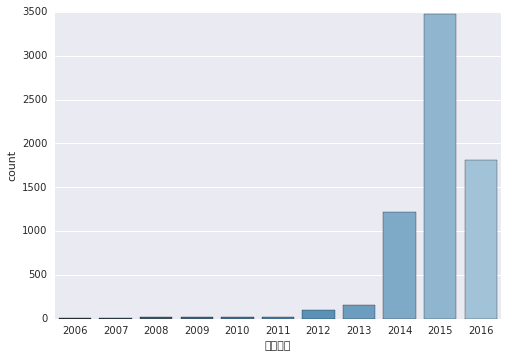

In [75]:
sns.countplot(x="挂牌年度", data=stocks_neeq_all, palette="Blues_d");

In [74]:
stocks_neeq_all["所属证监会行业"].value_counts()

软件和信息技术服务业          1062
专用设备制造业              481
计算机、通信和其他电子设备制造业     423
电气机械和器材制造业           400
化学原料和化学制品制造业         372
通用设备制造业              323
互联网和相关服务             296
商务服务业                284
专业技术服务业              204
医药制造业                199
仪器仪表制造业              170
非金属矿物制品业             170
批发业                  162
橡胶和塑料制品业             137
金属制品业                134
汽车制造业                134
农副食品加工业              111
生态保护和环境治理业           108
零售业                   98
建筑装饰和其他建筑业            84
土木工程建筑业               78
食品制造业                 74
农业                    74
广播、电视、电影和影视录音制作业      72
科技推广和应用服务业            71
有色金属冶炼和压延加工业          67
畜牧业                   48
纺织业                   48
房地产业                  41
造纸和纸制品业               41
                    ... 
金属制品、机械和设备修理业          9
技术硬件与设备                9
其他服务业                  9
居民服务业                  7
渔业                     7
仓储业                    7
软件与服务                  6
制药、生物科技与生命科学           4
资本货物                   4
